In [1]:
% matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

#### Set the font of plots as 'Cambria'

In [2]:
plt.rcParams['font.sans-serif'] = ['Cambria'] 

#### Read file

In [3]:
df = pd.read_csv('https://www.dropbox.com/s/kxmsz7wrpcncpkl/data.csv?dl=1')

In [4]:
df.head(10)

,stakes,offer,accept,wealth
0,200,50,1,1
1,200,5,1,1
2,20,2,0,1
3,200,5,0,1
4,2000,500,1,1
5,200,40,0,1
6,2000,500,1,1
7,200,1,0,0
8,2000,500,1,1
9,20,16,1,1


### Table 1: Experimental Design Summary

In [5]:
table1 = pd.crosstab(df['wealth'], df['stakes'], margins = True)

In [6]:
table1.rename(index = {0: 'No Wealth', 1: 'Wealth'}, inplace = True)

In [7]:
table1

stakes,20,200,2000,20000,All
wealth,,,,,
No Wealth,28,50,46,12,136
Wealth,173,74,63,12,322
All,201,124,109,24,458


### Figure 1: Offer Proportion across Stakes

#### Generate a new column 'precent_Offer' for offer proportion, which is 'offer' divided by 'stakes'.

In [8]:
df = df.assign(percent_Offer = df['offer'] / df['stakes'])

In [9]:
df.head(10)

,stakes,offer,accept,wealth,percent_Offer
0,200,50,1,1,0.250
1,200,5,1,1,0.025
2,20,2,0,1,0.100
3,200,5,0,1,0.025
4,2000,500,1,1,0.250
5,200,40,0,1,0.200
6,2000,500,1,1,0.250
7,200,1,0,0,0.005
8,2000,500,1,1,0.250
9,20,16,1,1,0.800


#### Grouped by 'stakes', calculate the mean of 'percent_Offer' for each amount of stakes

In [10]:
figure1 = df.groupby(['stakes'])['percent_Offer'].mean().reset_index()

In [11]:
figure1.rename(columns = {'percent_Offer': 'average_share_offered'}, inplace = True)

In [12]:
figure1

,stakes,average_share_offered
0,20,0.242289
1,200,0.174476
2,2000,0.144138
3,20000,0.120833


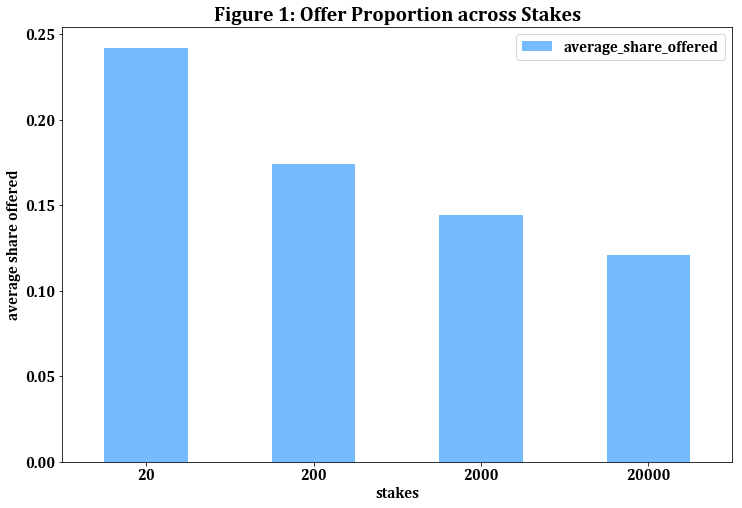

In [13]:
figure1.plot.bar(x = 'stakes', 
                 y = 'average_share_offered', 
                 rot = 0, 
                 color = 'xkcd:sky blue', 
                 figsize = (12, 8), 
                 fontsize = 15)
plt.title('Figure 1: Offer Proportion across Stakes', fontsize = 20)
plt.legend(fontsize = 15)
plt.xlabel('stakes', fontsize = 15)
plt.ylabel('average share offered', fontsize = 15);

### Figure 2: Offer Distribution across Stakes

#### Put rows that satisfies "stakes == x" into df_x

In [14]:
df_20 = df[df['stakes'] == 20]
df_200 = df[df['stakes'] == 200]
df_2000 = df[df['stakes'] == 2000]
df_20000 = df[df['stakes'] == 20000]

In [15]:
df_2000.head(10)

,stakes,offer,accept,wealth,percent_Offer
4,2000,500,1,1,0.250
6,2000,500,1,1,0.250
8,2000,500,1,1,0.250
17,2000,1900,1,0,0.950
18,2000,100,1,0,0.050
20,2000,120,0,0,0.060
36,2000,250,1,1,0.125
40,2000,10,0,1,0.005
46,2000,300,0,0,0.150
49,2000,50,0,1,0.025


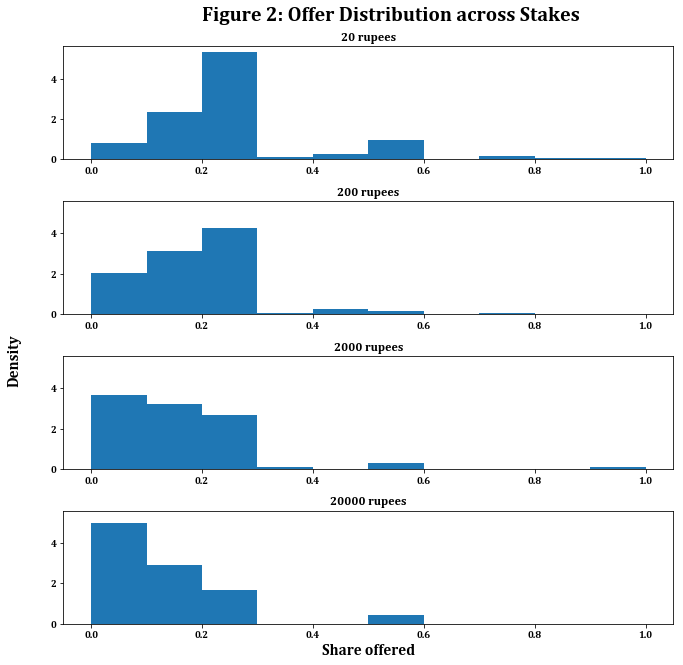

In [16]:
fig2, axarr = plt.subplots(4, sharey = True, figsize = (9, 9))

x_20 = df_20['percent_Offer']
x_200 = df_200['percent_Offer']
x_2000 = df_2000['percent_Offer']
x_20000 = df_20000['percent_Offer']

axarr[0].hist(x_20, 
              bins = 10, 
              range = (0, 1), 
              density = True)
axarr[0].set_title('20 rupees')

axarr[1].hist(x_200, bins = 10, range = (0, 1), density = True)
axarr[1].set_title('200 rupees')

axarr[2].hist(x_2000, bins = 10, range = (0, 1), density = True)
axarr[2].set_title('2000 rupees')

axarr[3].hist(x_20000, bins = 10, range = (0, 1), density = True)
axarr[3].set_title('20000 rupees')

fig2.subplots_adjust(hspace = 1)
fig2.text(-0.05, 0.5, 'Density', rotation='vertical', fontsize = 15)
plt.xlabel('Share offered', fontsize = 15)
fig2.text(0.25, 1, 'Figure 2: Offer Distribution across Stakes', fontsize = 20)
plt.tight_layout()

plt.show()

### Table 2: Rejection Rates by Wealth and Stakes

In [17]:
table2 = pd.crosstab(df['wealth'], df['stakes'],
                     values = 100 * (1 - df['accept']),
                     aggfunc = 'mean',
                     margins = True)

In [18]:
table2.rename(index = {0: 'No Wealth', 1: 'Wealth'}, inplace = True)

In [19]:
table2.round(2)

stakes,20,200,2000,20000,All
wealth,,,,,
No Wealth,46.43,36.00,19.57,0.00,29.41
Wealth,34.68,47.30,33.33,8.33,36.34
All,36.32,42.74,27.52,4.17,34.28


In [20]:
table2

stakes,20,200,2000,20000,All
wealth,,,,,
No Wealth,46.428571,36.000000,19.565217,0.000000,29.411765
Wealth,34.682081,47.297297,33.333333,8.333333,36.335404
All,36.318408,42.741935,27.522936,4.166667,34.279476


### Figure 3: Predicted Rejection Rates

In [21]:
new_col = df['offer'] / 100

In [22]:
df = df.assign(DaysW = new_col)

In [23]:
df.head(10)

,stakes,offer,accept,wealth,percent_Offer,DaysW
0,200,50,1,1,0.250,0.50
1,200,5,1,1,0.025,0.05
2,20,2,0,1,0.100,0.02
3,200,5,0,1,0.025,0.05
4,2000,500,1,1,0.250,5.00
5,200,40,0,1,0.200,0.40
6,2000,500,1,1,0.250,5.00
7,200,1,0,0,0.005,0.01
8,2000,500,1,1,0.250,5.00
9,20,16,1,1,0.800,0.16


In [24]:
X = df['DaysW']
y = 1 - df['accept']

In [25]:
X = sm.add_constant(X, prepend = False, has_constant = 'skip')
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.622796
         Iterations 7


In [26]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.031     
Dependent Variable: accept           AIC:              574.4807  
Date:               2019-04-04 21:51 BIC:              582.7344  
No. Observations:   458              Log-Likelihood:   -285.24   
Df Model:           1                LL-Null:          -294.44   
Df Residuals:       456              LLR p-value:      1.8001e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
DaysW     -0.1602     0.0544   -2.9453   0.0032   -0.2668   -0.0536
const     -0.4610     0.1093   -4.2166   0.0000   -0.6753   -0.2467
=================================================================

"""

Text(0.5,1,'Figure 3: Predicted Rejection Rates')

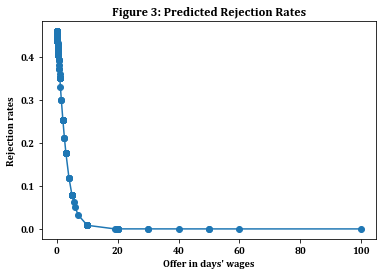

In [27]:
X = sm.add_constant(df['DaysW'].sort_values())
table3 = result.predict(X)

# Draw Figure 3
plt.xlabel('Offer in days\' wages')
plt.ylabel('Rejection rates')
plt.plot(df['DaysW'].sort_values(), table3, marker = 'o')
plt.title('Figure 3: Predicted Rejection Rates')

### Figure 4: Rejection Rates for Unfair Offers

In [28]:
df_01 = df[df['percent_Offer'] <= 0.1]
df_02 = df[df['percent_Offer'] > 0.1]
df_02 = df[df['percent_Offer'] <= 0.2]
df_03 = df[df['percent_Offer'] > 0.2]
df_03 = df[df['percent_Offer'] <= 0.3]

In [29]:
df_03.head(10)

,stakes,offer,accept,wealth,percent_Offer,DaysW
0,200,50,1,1,0.250,0.50
1,200,5,1,1,0.025,0.05
2,20,2,0,1,0.100,0.02
3,200,5,0,1,0.025,0.05
4,2000,500,1,1,0.250,5.00
5,200,40,0,1,0.200,0.40
6,2000,500,1,1,0.250,5.00
7,200,1,0,0,0.005,0.01
8,2000,500,1,1,0.250,5.00
10,20,2,1,1,0.100,0.02


In [30]:
fig4_1 = df_01.groupby(['stakes'])['accept'].agg(['mean', 'count']).reset_index()
fig4_1['mean'] = 1 - fig4_1['mean'].values
fig4_1.rename(columns = {'mean': 'rejection_Rates'}, inplace = True)

fig4_2 = df_02.groupby(['stakes'])['accept'].agg(['mean', 'count']).reset_index()
fig4_2['mean'] = 1 - fig4_2['mean'].values
fig4_2.rename(columns = {'mean': 'rejection_Rates'}, inplace = True)

fig4_3 = df_03.groupby(['stakes'])['accept'].agg(['mean', 'count']).reset_index()
fig4_3['mean'] = 1 - fig4_3['mean'].values
fig4_3.rename(columns = {'mean': 'rejection_Rates'}, inplace = True)

In [31]:
fig4_3

,stakes,rejection_Rates,count
0,20,0.394118,170
1,200,0.444444,117
2,2000,0.278846,104
3,20000,0.043478,23


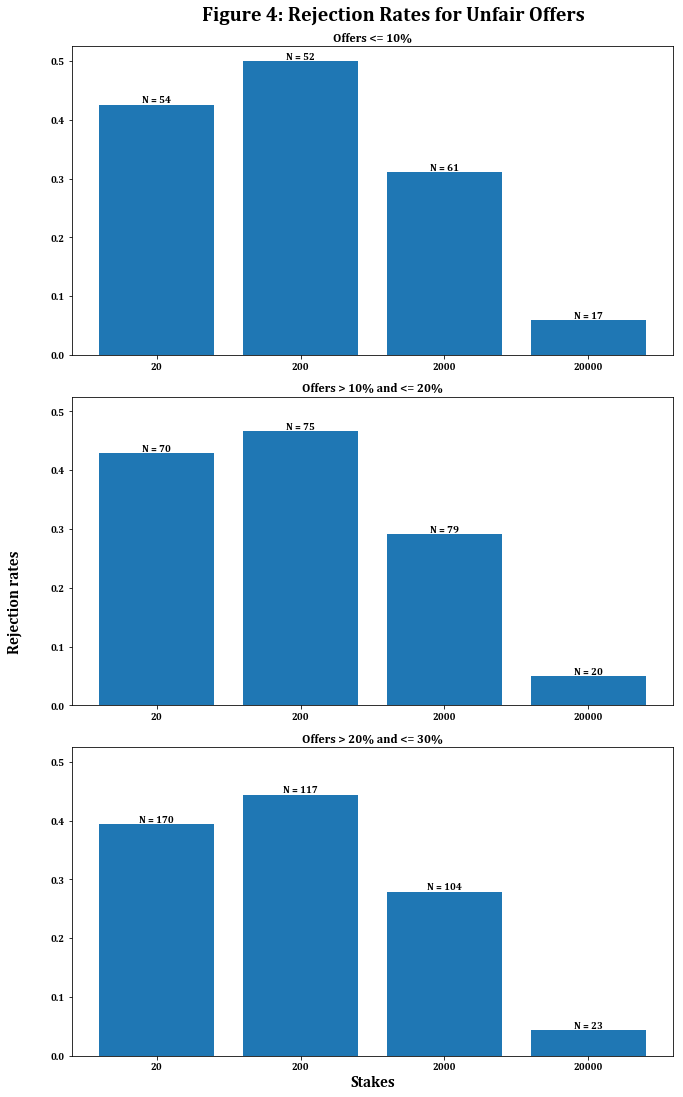

In [32]:
fig4, axarr = plt.subplots(3, sharey=True, figsize=(9, 15))

axarr[0].bar(np.arange(1, 5), 
             fig4_1['rejection_Rates'],
             tick_label = [20, 200, 2000, 20000])
axarr[0].set_title('Offers <= 10%')

axarr[1].bar(np.arange(1, 5), 
             fig4_2['rejection_Rates'], 
             tick_label = [20, 200, 2000, 20000])
axarr[1].set_title('Offers > 10% and <= 20%')

axarr[2].bar(np.arange(1, 5), 
             fig4_3['rejection_Rates'], 
             tick_label = [20, 200, 2000, 20000])
axarr[2].set_title('Offers > 20% and <= 30%')

fig4.subplots_adjust(hspace = 0.6)
fig4.text(-0.05, 0.5,'Rejection rates', 
          rotation='vertical',
          fontsize = 15)
plt.xlabel('Stakes', fontsize = 15)
plt.tight_layout()

for rect, label in zip(axarr[0].patches, fig4_1['count']):
    height = rect.get_height()
    axarr[0].text(rect.get_x() + rect.get_width() / 2, height, 'N = ' + str(label), ha='center', va='bottom')
    
for rect, label in zip(axarr[1].patches, fig4_2['count']):
    height = rect.get_height()
    axarr[1].text(rect.get_x() + rect.get_width() / 2, height, 'N = ' + str(label), ha='center', va='bottom')
    
for rect, label in zip(axarr[2].patches, fig4_3['count']):
    height = rect.get_height()
    axarr[2].text(rect.get_x() + rect.get_width() / 2, height, 'N = ' + str(label), ha='center', va='bottom')

# Show Figure 4
fig4.text(0.25, 1, 'Figure 4: Rejection Rates for Unfair Offers', fontsize = 20)
plt.show()

### Table 3: Logit Regression Results

In [33]:
# Add dummy variables to data for further regression
new_col = (df['stakes'] == 200).astype(int)
df = df.assign(stakes_2 = new_col)

new_col = (df['stakes'] == 2000).astype(int)
df = df.assign(stakes_3 = new_col)

new_col = (df['stakes'] == 20000).astype(int)
df = df.assign(stakes_4 = new_col)

# Show the first ten observations
df.head(10)

,stakes,offer,accept,wealth,percent_Offer,DaysW,stakes_2,stakes_3,stakes_4
0,200,50,1,1,0.250,0.50,1,0,0
1,200,5,1,1,0.025,0.05,1,0,0
2,20,2,0,1,0.100,0.02,0,0,0
3,200,5,0,1,0.025,0.05,1,0,0
4,2000,500,1,1,0.250,5.00,0,1,0
5,200,40,0,1,0.200,0.40,1,0,0
6,2000,500,1,1,0.250,5.00,0,1,0
7,200,1,0,0,0.005,0.01,1,0,0
8,2000,500,1,1,0.250,5.00,0,1,0
9,20,16,1,1,0.800,0.16,0,0,0


In [34]:
# collect variables
X = df.columns[3:].drop('DaysW')

In [35]:
y = 1 - df['accept']
X = sm.add_constant(df[X], prepend = False, has_constant = 'skip')

# do logistic regression
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.604420
         Iterations 7


In [36]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.060     
Dependent Variable: accept           AIC:              565.6483  
Date:               2019-04-04 21:51 BIC:              590.4095  
No. Observations:   458              Log-Likelihood:   -276.82   
Df Model:           5                LL-Null:          -294.44   
Df Residuals:       452              LLR p-value:      1.3585e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
wealth             0.2866   0.2396  1.1963 0.2316 -0.1830  0.7562
percent_Offer     -3.1661   0.8977 -3.5271 0.0004 -4.9255 -1.4067
stakes_2           0.1523   0.2504  0.6082 0.5430 -0.3384  0.6430
stakes_3          -0.6402   0.2846 -2.2495 0.0245 -1.1981 -0.0824
stakes_4          -2.8743   1.0425 -2.7571 0.0058 -4.9176 -0.8310
const             -0.0772   0.3206 -0.2409 0.8097 -0.7056  0.5511
=================================================================

"""